#### Quiz: Analyzing Student Data

Consider a dataset containing information about students in a school. Use the following randomly generated data for the quiz as following template. The sample data should have following features: <br>
Student ID - RANGE (1-100) <br>
Class : A,B,C <br>
Gender: Male, Female <br>
Subject: EE, CS, SE <br>
Score: 40-100 <br>
##### Submission Guidelines 
Provide solution in given cell only. <br>
Don't write anything for question(s) you're not attempting. <br>
Rename the .ipynb file with following convention to get marked your questions -> 21F-1234_Q4

In [32]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Generate random student data
data = {
    'StudentID': np.arange(1, 101),
    'Class': np.random.choice(['A', 'B', 'C'], size=100),
    # fill the code here to generate values as required
}



# Generate random student data
data = {
    'StudentID': np.arange(1, 101),
    'Class': np.random.choice(['A', 'B', 'C'], size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Subject': np.random.choice(['EE', 'CS', 'SE'], size=100),
    'Score': np.random.randint(40, 101, size=100),
    'CGPA': np.random.uniform(1,4, size=100),
    
}

# Generate dataframe
df = pd.DataFrame(data)
print(df)



    StudentID Class  Gender Subject  Score      CGPA
0           1     C  Female      EE     41  2.226859
1           2     C    Male      CS     66  1.519883
2           3     C  Female      EE     81  1.469311
3           4     A    Male      CS     41  1.750729
4           5     C  Female      EE     65  2.647680
..        ...   ...     ...     ...    ...       ...
95         96     B  Female      CS     65  3.850186
96         97     C  Female      CS     92  3.851821
97         98     C  Female      SE     62  2.720314
98         99     B  Female      CS     48  2.895512
99        100     A    Male      SE     51  2.345337

[100 rows x 6 columns]


#### 1. Calculate the average score for each class using pivot table.

In [33]:
#Add Solution here
class_avg_score = df.pivot_table(values='CGPA', index='Class', aggfunc='mean')
print("Average score for each class:\n", class_avg_score)


Average score for each class:
            CGPA
Class          
A      2.582078
B      2.722355
C      2.269768


#### 2. Find the total number of students in each class and gender.

In [34]:
#Add Solution here

class_gender_count = df.pivot_table(values='StudentID', index='Class', columns='Gender', aggfunc='count', margins=True, margins_name='Total')
print("Total number of students in each class by gender:\n", class_gender_count)


Total number of students in each class by gender:
 Gender  Female  Male  Total
Class                      
A           16    17     33
B           14    11     25
C           22    20     42
Total       52    48    100


#### 3. Create a pivot table to show the average score for each subject by gender.

In [35]:
#Add Solution here


subject_gender_avg_score = df.pivot_table(values='Score', index='Subject', columns='Gender', aggfunc='mean')
print("Average score for each subject by gender:\n", subject_gender_avg_score)


Average score for each subject by gender:
 Gender      Female       Male
Subject                      
CS       76.666667  70.117647
EE       68.142857  68.647059
SE       81.250000  71.214286


#### 4. Calculate the maximum score for each subject in each class.


In [36]:
#Add Solution here

max_score_subject_class = df.pivot_table(values='Score', index='Class', columns='Subject', aggfunc='max')
print("Maximum score for each subject in each class:\n", max_score_subject_class)


Maximum score for each subject in each class:
 Subject   CS  EE  SE
Class               
A         97  99  91
B         95  97  99
C        100  97  99


#### 5.1. Generate a stacked bar chart to represent the total number of students in each class and gender.

In [37]:
# #Add Solution here

# import matplotlib.pyplot as plt

# class_gender_count.plot(kind='bar', stacked=True)
# plt.title('Total Number of Students by Class and Gender')
# plt.xlabel('Class')
# plt.ylabel('Number of Students')
# plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'class_gender_count' is a DataFrame containing class, gender, and count columns

# Using Seaborn to create a stacked bar plot
sns.barplot(data=class_gender_count, x='Class', y='Number of Students', hue='Gender', estimator=sum)
plt.title('Total Number of Students by Class and Gender')
plt.xlabel('Class')
plt.ylabel('Number of Students')
plt.legend(title='Gender')
plt.show()


ValueError: Could not interpret input 'Class'

#### 5.2. Plot a scatter plot to visualize the relationship between scores in CS and SE.

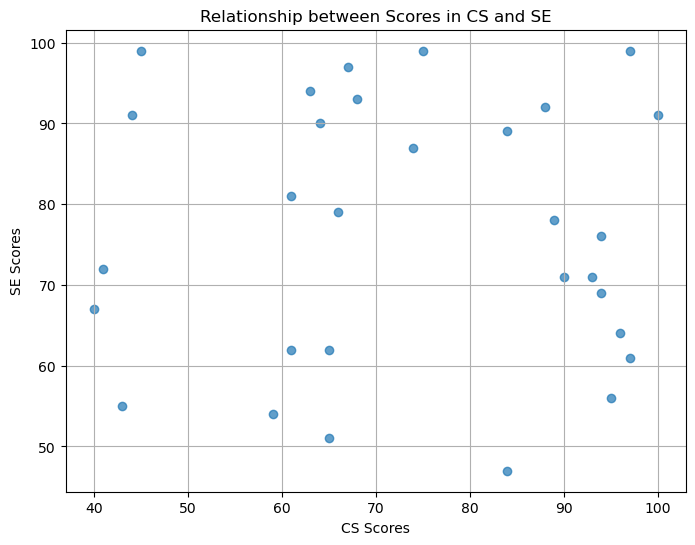

In [42]:
import matplotlib.pyplot as plt

# Extract CS and SE scores
cs_scores = df[df['Subject'] == 'CS']['Score']
se_scores = df[df['Subject'] == 'SE']['Score']

# Make sure both CS and SE scores have the same number of elements
min_length = min(len(cs_scores), len(se_scores))
cs_scores = cs_scores[:min_length]
se_scores = se_scores[:min_length]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(cs_scores, se_scores, alpha=0.7)
plt.title('Relationship between Scores in CS and SE')
plt.xlabel('CS Scores')
plt.ylabel('SE Scores')
plt.grid(True)
plt.show()

# import seaborn as sns
# import matplotlib.pyplot as plt

# # # Extract CS and SE scores
# # cs_scores = df[df['Subject'] == 'CS']['Score']
# # se_scores = df[df['Subject'] == 'SE']['Score']

# # # Make sure both CS and SE scores have the same number of elements
# # min_length = min(len(cs_scores), len(se_scores))
# # cs_scores = cs_scores[:min_length]
# # se_scores = se_scores[:min_length]

# # # Create a DataFrame from the scores
# # data = pd.DataFrame({'CS Scores': cs_scores, 'SE Scores': se_scores})

# # # Create a scatter plot using Seaborn
# # plt.figure(figsize=(8, 6))
# # sns.scatterplot(data=data, x='CS Scores', y='SE Scores', alpha=0.7)
# # plt.title('Relationship between Scores in CS and SE')
# # plt.xlabel('CS Scores')
# # plt.ylabel('SE Scores')
# # plt.grid(True)
# # plt.show()



#### 5.3. Create a line plot to display the trend of scores over the student IDs.

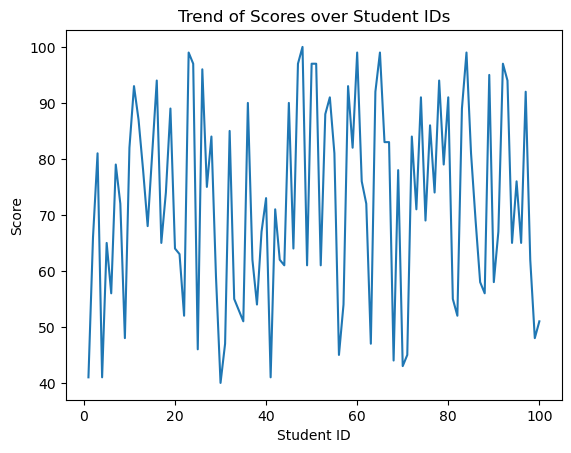

In [46]:
#Add Solution here

plt.plot(df['StudentID'], df['Score'])
plt.title('Trend of Scores over Student IDs')
plt.xlabel('Student ID')
plt.ylabel('Score')
plt.show()
